In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#A1
# Loading the Excel file
df = pd.read_excel('LabSessionData.xlsx', sheet_name='Purchase_data')

#Segmentation of the data
A = df[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']].values
C = df[['Payment (Rs)']].values

# Calculating the cost of each item
A_inv = np.linalg.pinv(A)
X_values = A_inv @ C

# Creating a DataFrame X
X = pd.DataFrame(X_values.T, columns=['Candies Cost', 'Mangoes Cost', 'Milk Packets Cost'])

display(X)

,Candies Cost,Mangoes Cost,Milk Packets Cost
0,1.0,55.0,18.0


In [6]:
#A2
# Rename the column-5
df = df.rename(columns={'Unnamed: 5': 'Rich or Poor'})

# Mark customers as 'rich' if Payment (Rs) is greater than 200 and as 'poor' if Payment (Rs) is less than equal to 200
df['Rich or Poor'] = np.where(df['Payment (Rs)'] > 200, 'rich', df['Rich or Poor'])
df['Rich or Poor'] = np.where(df['Payment (Rs)'] <= 200, 'poor', df['Rich or Poor'])

features = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
lalbels = df['Rich or Poor']

X_train,X_test, y_train, y_test = train_test_split(features,lalbels,test_size=0.2,random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(df)
print(classification_report(y_test,y_pred))

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

  Rich or Poor  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         rich         NaN         NaN         NaN         NaN  ...   
1         rich         NaN         NaN         NaN    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean of 'a': 1560.663453815261
Variance of 'a': 58732.365352539186
Mean of wednesday prices : 1550.706
Observation: The sample mean of Wednesday prices is less than the population mean.
Mean of April prices : 1698.9526315789474
Observation: The sample mean of April prices is greater than the population mean.
Probability of making a loss: 0.4980
Probability of making a profit on Wednesday: 0.4200
Conditional probability of making profit given that today is Wednesday: 2.0916


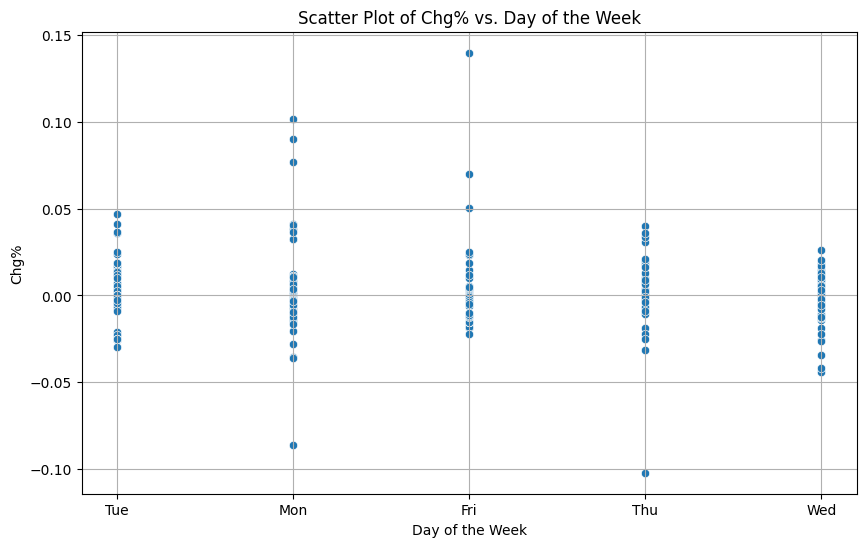

In [7]:
#A3
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
IRCTC_df = pd.read_excel('LabSessionData.xlsx', sheet_name='IRCTC_Stock_Price')
a = IRCTC_df[['Price']].values

mean_a = statistics.mean(a.flatten())
variance_a = statistics.variance(a.flatten())

print(f"Mean of 'a': {mean_a}")
print(f"Variance of 'a': {variance_a}")

# Calc Mean of all wednesday data
wednesday_prices = IRCTC_df[IRCTC_df['Day'] == 'Wed']['Price']
sample_mean_wednesday = statistics.mean(wednesday_prices)
print(f"Mean of wednesday prices : {sample_mean_wednesday}")

if sample_mean_wednesday > mean_a:
    print("Observation: The sample mean of Wednesday prices is greater than the population mean.")
elif sample_mean_wednesday < mean_a:
    print("Observation: The sample mean of Wednesday prices is less than the population mean.")
else:
    print("Observation: The sample mean of Wednesday prices is equal to the population mean.")

#Calc Mean of the whole April Month
april_prices = IRCTC_df[IRCTC_df['Month'] == 'Apr']['Price']
sample_mean_april = statistics.mean(april_prices)
print(f"Mean of April prices : {sample_mean_april}")

if sample_mean_april > mean_a:
  print("Observation: The sample mean of April prices is greater than the population mean.")
elif sample_mean_april < mean_a:
  print("Observation: The sample mean of April prices is lesser than the population mean.")
else:
  print("Observation: The sample mean of April prices is equal to the population mean.")

# Calculating the number of losses (negative Chg%) using a lambda function
num_losses = IRCTC_df['Chg%'].apply(lambda x: x < 0).sum()
total_observations = len(IRCTC_df)
probability_loss = num_losses / total_observations
print(f"Probability of making a loss: {probability_loss:.4f}")

# Calculating the probability of making a profit on Wednesday
wednesday_data = IRCTC_df[IRCTC_df['Day'] == 'Wed']
num_profits_wednesday = wednesday_data['Chg%'].apply(lambda x: x > 0).sum()
total_wednesday_observations = len(wednesday_data)
probability_profit_wednesday = num_profits_wednesday / total_wednesday_observations
print(f"Probability of making a profit on Wednesday: {probability_profit_wednesday:.4f}")

#Calculating the conditional probability of making profit, given that today is Wednesday
num_wednesdays = len(IRCTC_df[IRCTC_df['Day'] == 'Wed'])
probability_wednesday = num_wednesdays / total_observations
conditional_probability_profit_given_wednesday = probability_profit_wednesday / probability_wednesday
print(f"Conditional probability of making profit given that today is Wednesday: {conditional_probability_profit_given_wednesday:.4f}")

# Create a scatter plot of Chg% against the Day of the week
plt.figure(figsize=(10, 6))
sns.scatterplot(data=IRCTC_df, x='Day', y='Chg%')
plt.title('Scatter Plot of Chg% vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.grid(True)
plt.show()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64,t,0.83,t,77,f,?,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91,t,0.92,t,99,f,?,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113,t,1.27,t,89,f,?,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75,t,0.85,t,88,f,?,other,NO CONDITION


Categorical columns and their unique values:

- sex: ['F' 'M' '?']

- on thyroxine: ['f' 't']

- query on thyroxine: ['f' 't']

- on antithyroid medication: ['f' 't']

- sick: ['f' 't']

- pregnant: ['f' 't']

- thyroid surgery: ['f' 't']

- I131 treatment: ['f' 't']

- query hypothyroid: ['t' 'f']

- query hyperthyroid: ['f' 't']

- lithium: ['f' 't']

- goitre: ['f' 't']

- tumor: ['f' 't']

- hypopituitary: ['f' 't']

- psych: ['f' 't']

- TSH measured: ['t' 'f']

- TSH: [0.3 1.6 '?' 0.7 1.2 1.9 1 0.5 2.6 68 1.5 5.9 0.05 4 0.4 0.8 0.2 3
 9.599999 140 0.6 1.7 2.5 6.8 2.1 1.1 9.799999 3.7 0.1 0.35 90 1.3 2.7 2.9
 0.25 5.8 2 0.9 3.2 7.4 1.8 5 70 6.5 11.599999 4.2 88 2.2 53 16.5 8.4 4.1
 3.3 80 176 30 11 6 71 9.099999 10.7 4.9 3.4 1.83 4.6 1.4 14 3.5 46 18 170
 19.199999 7.5 145 7.9 19 48 25 7.3 6.7 153 35 3.8 2.3 9.2 12 5.5
 15.299999 0.15 10.299999 430 213 37 216 26 4.3 2.4 47 8.2 14.4 17.4 100
 13.2 41 3.1 22 45 4.5 24 65 4.4 56 11.4 5.2 5.6 8.299999 400 260 5.4 8
 6.6 8.5 5.1 138 42

,Record ID,age
count,9.172000e+03,9172.000000
mean,8.529473e+08,73.555822
std,7.581969e+06,1183.976718
min,8.408010e+08,1.000000
25%,8.504090e+08,37.000000
50%,8.510040e+08,55.000000
75%,8.607110e+08,68.000000
max,8.701190e+08,65526.000000



Missing Values per Attribute:


,0
Record ID,0
age,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0



Box plots for numeric variables to visualize outliers:


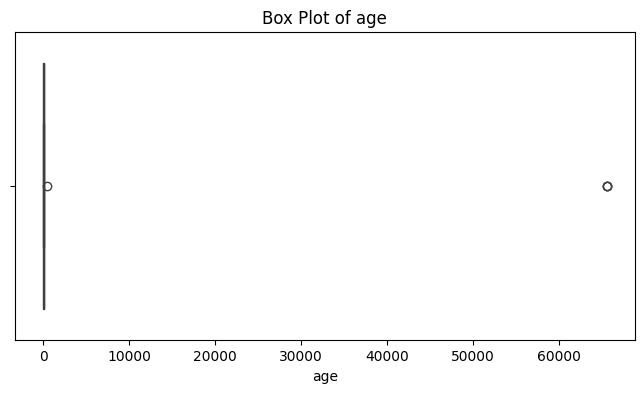

Mean and Standard Deviation for Numeric Variables:


,Record ID,age
mean,8.529473e+08,73.555822
std,7.581969e+06,1183.976718



Variance for Numeric Variables:


,0
Record ID,5.748625e+13
age,1.401801e+06


In [8]:
#A4
thyroid_df = pd.read_excel('LabSessionData.xlsx', sheet_name='thyroid0387_UCI')
display(thyroid_df)

# Identifying categorical columns
categorical_cols = thyroid_df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns and their unique values:")
for col in categorical_cols:
    print(f"\n- {col}: {thyroid_df[col].unique()}")

# Study the data range for numeric variables
print("Data Range for Numeric Variables:")
display(thyroid_df.describe())

# Study the presence of missing values in each attribute
print("\nMissing Values per Attribute:")
display(thyroid_df.isnull().sum())

# Study presence of outliers in data for numeric columns using box plots
print("\nBox plots for numeric variables to visualize outliers:")
numeric_cols = thyroid_df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('Record ID', errors='ignore')
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=thyroid_df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

#calculating the mean and variance (or standard deviation).
numeric_df = thyroid_df.select_dtypes(include=np.number)
numeric_df = numeric_df.drop('Record ID', errors='ignore')
print("Mean and Standard Deviation for Numeric Variables:")
display(numeric_df.describe().loc[['mean', 'std']])
print("\nVariance for Numeric Variables:")
display(numeric_df.var())

In [9]:
#A5
#Simularity Measure
# List of binary attributes
binary_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
    'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre',
    'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured',
    'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured'
]

# Extract first two records and convert binary values (t/f to 1/0); '?' treated as NaN
binary_data = thyroid_df.loc[:1, binary_cols].replace({'t': 1, 'f': 0, '?': None}).astype(float)

# Drop columns with missing values in first 2 rows
binary_data = binary_data.dropna(axis=1)

# Extract two binary vectors
vec1 = binary_data.iloc[0].values
vec2 = binary_data.iloc[1].values

# Similarity counts
a = ((vec1 == 1) & (vec2 == 1)).sum()
b = ((vec1 == 1) & (vec2 == 0)).sum()
c = ((vec1 == 0) & (vec2 == 1)).sum()
d = ((vec1 == 0) & (vec2 == 0)).sum()

# Compute coefficients
jc = a / (a + b + c) if (a + b + c) > 0 else 0
smc = (a + d) / (a + b + c + d)

# Display results
print(f"Jaccard Coefficient: {jc:.3f}")
print(f"Simple Matching Coefficient: {smc:.3f}")

Jaccard Coefficient: 0.250
Simple Matching Coefficient: 0.850


/tmp/ipython-input-9-3526256066.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_data = thyroid_df.loc[:1, binary_cols].replace({'t': 1, 'f': 0, '?': None}).astype(float)


In [10]:
#A6
#Cosine similarity Measure
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

# Convert categorical t/f/? to numeric where applicable
thyroid_numeric = thyroid_df.replace({'t': 1, 'f': 0, '?': np.nan})

# Use only numeric columns
thyroid_numeric = thyroid_numeric.select_dtypes(include=[np.number])

# Impute missing values with column means
imputer = SimpleImputer(strategy='mean')
imputed_array = imputer.fit_transform(thyroid_numeric)
imputed_df = pd.DataFrame(imputed_array, columns=thyroid_numeric.columns)

# Select second vector from each of the first two observations (row 1 and 0)
vec1 = imputed_df.iloc[1].values.reshape(1, -1)
vec2 = imputed_df.iloc[0].values.reshape(1, -1)

# Calculate cosine similarity
cos_sim = cosine_similarity(vec1, vec2)[0][0]

print(f"Cosine Similarity (2nd vector of Rec1 vs Rec2): {cos_sim:.4f}")

Cosine Similarity (2nd vector of Rec1 vs Rec2): 1.0000


/tmp/ipython-input-10-4294461163.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_numeric = thyroid_df.replace({'t': 1, 'f': 0, '?': np.nan})


/tmp/ipython-input-11-1650491320.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_data = thyroid_df.loc[:19, binary_cols].replace({'t': 1, 'f': 0, '?': np.nan}).astype(float)
/tmp/ipython-input-11-1650491320.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_data = thyroid_df.loc[:19].replace({'t': 1, 'f': 0, '?': np.nan})


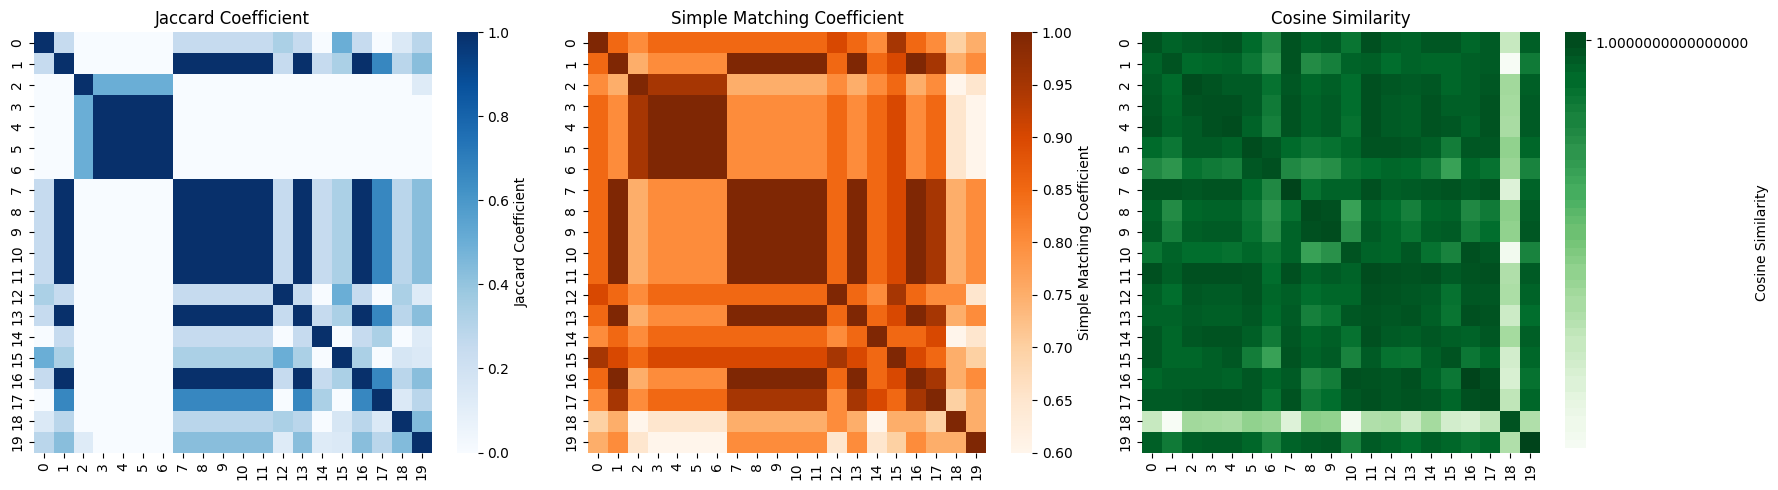

In [11]:
#A7
import matplotlib.pyplot as plt
binary_cols = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
    'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre',
    'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured',
    'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured'
]

# Extract and encode binary data (first 20 rows), convert 't'/'f' to 1/0
binary_data = thyroid_df.loc[:19, binary_cols].replace({'t': 1, 'f': 0, '?': np.nan}).astype(float)

# Fill missing values in binary_data with mode, do NOT drop columns
for col in binary_data.columns:
    if binary_data[col].isnull().any():
        mode_val = binary_data[col].mode()
        if not mode_val.empty:
            binary_data[col].fillna(mode_val.iloc[0], inplace=True)
        else:
            binary_data[col].fillna(0, inplace=True)

# Prepare numeric data for cosine similarity (as you had it)
numeric_data = thyroid_df.loc[:19].replace({'t': 1, 'f': 0, '?': np.nan})
numeric_data = numeric_data.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
imputed_numeric = imputer.fit_transform(numeric_data)

# Similarity functions remain unchanged
def jaccard_smc(vec1, vec2):
    a = np.sum((vec1 == 1) & (vec2 == 1))
    b = np.sum((vec1 == 1) & (vec2 == 0))
    c = np.sum((vec1 == 0) & (vec2 == 1))
    d = np.sum((vec1 == 0) & (vec2 == 0))
    jc = a / (a + b + c) if (a + b + c) > 0 else 0
    smc = (a + d) / (a + b + c + d)
    return jc, smc

n = 20
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

# Calculate pairwise similarities
for i in range(n):
    for j in range(n):
        jc_val, smc_val = jaccard_smc(binary_data.iloc[i].values, binary_data.iloc[j].values)
        jc_matrix[i, j] = jc_val
        smc_matrix[i, j] = smc_val
        cos_sim_val = cosine_similarity(imputed_numeric[i].reshape(1, -1), imputed_numeric[j].reshape(1, -1))[0, 0]
        cos_matrix[i, j] = cos_sim_val

# Plot heatmaps: use the same color maps as your friend for visual parity
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=False, cmap='Blues', cbar_kws={'label': 'Jaccard Coefficient'})
plt.title('Jaccard Coefficient')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=False, cmap='Oranges', cbar_kws={'label': 'Simple Matching Coefficient'})
plt.title('Simple Matching Coefficient')

plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=False, cmap='Greens', cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity')

plt.tight_layout()
plt.show()

In [12]:
#A8
from scipy.stats import mode

thyroid_df.replace('?', np.nan, inplace=True)
imputation_strategies = {}

# Loop through each column to handle missing values
for col in thyroid_df.columns:
    if thyroid_df[col].isnull().sum() > 0:
        col_numeric = pd.to_numeric(thyroid_df[col], errors='coerce')
        if np.issubdtype(col_numeric.dtype, np.number):
            col_non_null = col_numeric.dropna()
            # Use IQR method to detect outliers
            q1 = col_non_null.quantile(0.25)
            q3 = col_non_null.quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            has_outlier = ((col_non_null < lower_bound) | (col_non_null > upper_bound)).any()
            if has_outlier:
                # Impute with Median if outliers are present
                median_val = col_non_null.median()
                thyroid_df[col] = col_numeric.fillna(median_val)
                imputation_strategies[col] = "Median"
            else:
                # Impute with Mean if no outliers
                mean_val = col_non_null.mean()
                thyroid_df[col] = col_numeric.fillna(mean_val)
                imputation_strategies[col] = "Mean"
        else:
            mode_val = thyroid_df[col].mode(dropna=True)
            if not mode_val.empty:
                thyroid_df[col] = thyroid_df[col].fillna(mode_val.iloc[0])
                imputation_strategies[col] = "Mode"
            else:
                # Fallback if mode can't be found
                thyroid_df[col] = thyroid_df[col].fillna('Unknown')
                imputation_strategies[col] = "Mode (Fallback)"

# Print summary of imputations
print("\n Imputation Summary:")
for col, strategy in imputation_strategies.items():
    print(f" - {col}: Filled using {strategy}")
print("\n Missing value imputation completed successfully.")


 Imputation Summary:
 - sex: Filled using Mean
 - TSH: Filled using Median
 - T3: Filled using Median
 - TT4: Filled using Median
 - T4U: Filled using Median
 - FTI: Filled using Median
 - TBG: Filled using Median

 Missing value imputation completed successfully.


/tmp/ipython-input-12-3827102319.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_df.replace('?', np.nan, inplace=True)


In [13]:
#A9
from sklearn.preprocessing import MinMaxScaler, StandardScaler

thyroid_df.replace({'t': 1, 'f': 0, '?': np.nan}, inplace=True)
numeric_cols = [
    'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'
]
for col in numeric_cols:
    if thyroid_df[col].isnull().sum() > 0:
        median_value = pd.to_numeric(thyroid_df[col], errors='coerce').median()
        thyroid_df[col] = pd.to_numeric(thyroid_df[col], errors='coerce').fillna(median_value)

#normalization approach per column
minmax_cols = ['age', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
zscore_cols = ['TSH']

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
thyroid_df[minmax_cols] = scaler_minmax.fit_transform(thyroid_df[minmax_cols])

# Z-score Standardization
scaler_zscore = StandardScaler()
thyroid_df[zscore_cols] = scaler_zscore.fit_transform(thyroid_df[zscore_cols])

# Optional: Show first 5 records of normalized features
print("\nFirst 5 rows of normalized numeric data:")
display(thyroid_df[minmax_cols + zscore_cols].head())

/tmp/ipython-input-13-536842628.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_df.replace({'t': 1, 'f': 0, '?': np.nan}, inplace=True)



First 5 rows of normalized numeric data:


,age,T3,TT4,T4U,FTI,TBG,TSH
0,0.000427,0.103064,0.170569,0.365741,0.122328,0.129565,-0.197981
1,0.000427,0.103064,0.210702,0.365741,0.122328,0.129565,-0.141637
2,0.000610,0.103064,0.170569,0.365741,0.122328,0.054527,-0.150305
3,0.000534,0.103064,0.170569,0.365741,0.122328,0.129565,-0.150305
4,0.000473,0.103064,0.170569,0.365741,0.122328,0.179590,-0.150305
